# **Exercício**



O objetivo deste exercício é praticar atividades de obtenção, manipulação e análise de dados que seriam desempenhadas por um gestor de portfólio.

O foco é a biblioteca Pandas, mas você pode utilizar outra bibliotecas sempre que julgar necessário.

No exercício, você precisa desempenhar as seguintes tarefas:

1. Carregar no Python com a biblioteca pandas os arquivos .csv e .txt que foram passados. O arquivo .csv contém cotações de papéis brasileiros, e o arquivo .txt contém cotações de ações americanas.
2.  Utilizando a biblioteca yfinance, ou alguma outra fonte de sua escolha, obtenha os dados da cotação do dólar (apenas o Close) desde o dia inicial do dataframe das ações americanas (.txt)
3. Converta a cotação das ações americanas de dólar para real, utilizando os dados de cotação do dólar que você obteve anteriormente e crie um novo dataframe com o resultado desta operação.
4. Utilizando a função merge da Pandas, realize uma união entre os dataframes de ações brasileiras e o outro de ações americanas com as cotações convertidas para real.
5. Agora você vai simular o desempenho de uma carteira teórica. Para isto, considere a data de início dos aportes como sendo 05-03-2018. Considere que houve apenas um aporte. A carteira que você deve simular é a seguinte: 100 ações de PETR4, 100 ações de VALE3, 100 ações de LREN3, 200 ações de WEGE3, 10 ações de AAPL, 15 ações de META, 30 ações de Coca-Cola(KO) e 20 ações de Morgan Stanley (MS). Qual seria o saldo aproximado desta carteira, em R$ no dia 06/04/23?
6. Utilizando a yfinance, obtenha dados do IBOV e S&P 500. Junte isso aos dados do dólar anteriormente. Para o IBOV, utilize o ticker '^BVSP' e para o S&P500 utilize '^GSPC'. Modifique o nome dessas colunas para que no dataframe fiquem como 'IBOV' e 'S&P500'.
7. Crie um plot que compara o desempenho da carteira acima com o IBOV, S&P 500 e o dólar.
8. Qual era o saldo da carteira no dia 02/03/2020?



**Dicas importantes**

a. Na hora de carregar os arquivos .csv e .txt, fique atento à suas características, como separador, marcador decimal, formato do índice, dentre outros

b. Possivelmente, os dados da cotação do dólar vão ter um número de linhas superior ao dataframe de ações americanas, mesmo que sejam referentes à mesma data de início e de fim. Você pode utilizar o método para equalizar os índices e garantir que tenham o mesmo número de linhas

c. Para realizar a multiplicação entre o dataframe de ações americanas e cotação do dólar, você pode usar o método "mul", com uma estrutura parecida com esta:

*americanas.mul(dolar, axis=0)*

# 1. Importando bibliotecas

In [63]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# 2. Carregar os arquivos

In [2]:
# Para as brasileiras

acoesBr = pd.read_csv('acoes_brasileiras.csv', sep=';')

# "Date" para pandas
acoesBr['Date'] = pd.to_datetime(acoesBr['Date'])

# Mudar o indice
acoesBr = acoesBr.set_index('Date')

# Trocar "," por "."
for column in acoesBr.columns:
    acoesBr[column] = acoesBr[column].str.replace(',', '.')

# Transforma em float
for column in acoesBr.columns:
    acoesBr[column] = acoesBr[column].astype(float)

acoesBr

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2005-01-03,5167.226562,3.752022,8.902522,0.825184
2005-01-04,5167.226562,3.707412,8.539765,0.825184
2005-01-05,5167.226562,3.693071,8.480296,0.825184
2005-01-06,5167.226562,3.704225,8.444613,0.825184
2005-01-07,5167.226562,3.720555,8.670596,0.825184
...,...,...,...,...
2023-03-31,16.570000,23.450001,80.290001,40.549999
2023-04-03,15.410000,24.490000,80.309998,39.590000
2023-04-04,15.390000,24.270000,78.040001,39.630001


In [3]:
# Para as americanas

acoesEua = pd.read_table('acoes_americanas.txt', sep=';')

# "Date" para pandas
acoesEua['Date'] = pd.to_datetime(acoesEua['Date'])

# Mudar o indice
acoesEua = acoesEua.set_index('Date')

acoesEua

,AAPL,KO,META,MS,MSFT
Date,,,,,
2008-01-02,5.922567,19.046688,NaN,37.577785,25.791210
2008-01-03,5.925303,19.246229,NaN,37.570412,25.901058
2008-01-04,5.472996,19.283632,NaN,36.360840,25.176090
2008-01-07,5.399737,19.738840,NaN,35.630688,25.344519
2008-01-08,5.205502,19.819902,NaN,34.221977,24.495070
...,...,...,...,...,...
2023-03-31,164.899994,62.029999,211.940002,87.800003,288.299988
2023-04-03,166.169998,62.400002,213.070007,87.160004,287.230011
2023-04-04,165.630005,62.209999,214.720001,84.820000,287.179993


# 3. Dados do dólar

In [4]:
# Utilizando a biblioteca yfinance, obtenha os dados da cotação do dólar (apenas o Close) desde o dia inicial do dataframe das ações americanas (.txt)
# Pegando a data inicial e final
inicioEua = acoesEua.index[0]

# Importando dados
dolarTudo = yf.download("USDBRL=X", start=inicioEua)

# Pegando apenas "Close"
dolar = pd.DataFrame(dolarTudo["Close"])

# Mudando o nome da coluna
dolar.rename(columns={"Close":"Dolar"}, inplace=True)

dolar

[*********************100%***********************]  1 of 1 completed


,Dolar
Date,
2008-01-02,1.7645
2008-01-03,1.7480
2008-01-04,1.7572
2008-01-07,1.7640
2008-01-08,1.7520
...,...
2023-04-06,5.0332
2023-04-07,5.0583
2023-04-10,5.0544


# 4. Convertendo de dolar para real

In [5]:
# Converta a cotação das ações americanas de dólar para real, utilizando os dados de cotação do dólar que você obteve anteriormente e crie um novo dataframe com o resultado desta operação.

# Juntando os dfs
acoesEuaComDolar = acoesEua.join(dolar,how='left')

# Fazendo a multiplicacao da coluna pelo dolar e substituindo o valor
acoesEuaReal = acoesEuaComDolar.copy()

for column in acoesEuaComDolar.columns[:-1]:
    acoesEuaReal[column] = acoesEuaComDolar[column] * acoesEuaComDolar["Dolar"]

# Tirando a coluna de dolar
acoesEuaReal.drop("Dolar", axis=1, inplace=True)

acoesEuaReal

,AAPL,KO,META,MS,MSFT
Date,,,,,
2008-01-02,10.450370,33.607882,NaN,66.306003,45.508591
2008-01-03,10.357431,33.642409,NaN,65.673081,45.275050
2008-01-04,9.617148,33.885199,NaN,63.893268,44.239426
2008-01-07,9.525137,34.819315,NaN,62.852535,44.707732
2008-01-08,9.120039,34.724469,NaN,59.956903,42.915361
...,...,...,...,...,...
2023-03-31,839.786200,315.900175,1079.346851,447.139076,1468.225349
2023-04-03,841.202416,315.887541,1078.624342,441.230104,1454.044544
2023-04-04,838.601255,314.975438,1087.148808,429.452129,1454.020981


# 5. Unindo em um Df

In [6]:
acoesTodas = acoesBr.merge(acoesEuaReal, right_index=True, left_index=True, how="right")

acoesTodas

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT
Date,,,,,,,,,
2008-01-02,4.164557,15.457663,27.546089,2.696683,10.450370,33.607882,NaN,66.306003,45.508591
2008-01-03,4.110534,15.208918,27.688812,2.692368,10.357431,33.642409,NaN,65.673081,45.275050
2008-01-04,4.051811,14.462685,26.689732,2.685896,9.617148,33.885199,NaN,63.893268,44.239426
2008-01-07,3.814576,14.038044,26.213974,2.696683,9.525137,34.819315,NaN,62.852535,44.707732
2008-01-08,3.664247,14.809144,26.737303,2.621176,9.120039,34.724469,NaN,59.956903,42.915361
...,...,...,...,...,...,...,...,...,...
2023-03-31,16.570000,23.450001,80.290001,40.549999,839.786200,315.900175,1079.346851,447.139076,1468.225349
2023-04-03,15.410000,24.490000,80.309998,39.590000,841.202416,315.887541,1078.624342,441.230104,1454.044544
2023-04-04,15.390000,24.270000,78.040001,39.630001,838.601255,314.975438,1087.148808,429.452129,1454.020981


# 6. Simulando carteira teórica

In [61]:
# Agora você vai simular o desempenho de uma carteira teórica. 
# Para isto, considere a data de início dos aportes como sendo 05-03-2018. 
# Considere que houve apenas um aporte. A carteira que você deve simular é a seguinte: 
# 100 ações de PETR4, 100 ações de VALE3, 100 ações de LREN3, 200 ações de WEGE3, 
# 10 ações de AAPL, 15 ações de META, 30 ações de Coca-Cola(KO) e 20 ações de Morgan Stanley (MS). 
# Qual seria o saldo aproximado desta carteira, em R$ no dia 06/04/23?

# Passando dados da análise
dataInicio = datetime.datetime(2018,3,5)
dataFim = datetime.datetime(2023,4,6)
acoesAporte = [100, 100, 100, 200, 10, 30, 15, 20, 0]

# Saldo final para responder a pergunta e ter uma forma de conferir

valorAcoesInicio = acoesTodas.loc[dataInicio]
valorAcoesFim = acoesTodas.loc[dataFim]

rendimento = valorAcoesFim / valorAcoesInicio

saldosInicio = valorAcoesInicio * acoesAporte

saldosFim = saldosInicio * rendimento

saldoFim = saldosFim.sum()

# Montando um df novo completo

## Copiando o original
rendimentos = acoesTodas.copy()

## Pegando o intervalo definido
rendimentos = rendimentos.loc[dataInicio:dataFim]

## Calculando rendimentos
rendimentos = rendimentos.pct_change()

## Acumulando
rendimentosAcumulados = (1+rendimentos).cumprod()-1

## Ajustando a primeira linha
rendimentosAcumulados.fillna(0, inplace=True)

## Calculando o valor inicial de novo
saldoInicio = valorAcoesInicio * acoesAporte

## Calculando o valor para cada data
saldos = saldoInicio * (1 + rendimentosAcumulados)

## Fazendo uma coluna do total da carteira
saldos["Total"] = saldos.sum(axis=1)

## Saldo final
saldoFim2 = saldos.iloc[-1][-1]

print(f"Da primeira forma o saldo final é {saldoFim:.2f} e da segunda é {saldoFim2:.2f}")

Da primeira forma o saldo final é 61934.27 e da segunda é 61934.27


Assim, o saldo final é R$ 61.934,27

# 7. Baixando IBOV e S&P500

In [39]:
# Utilizando a yfinance, obtenha dados do IBOV e S&P 500. Junte isso aos dados do dólar anteriormente. Para o IBOV, utilize o ticker '^BVSP' e para o S&P500 utilize '^GSPC'. Modifique o nome dessas colunas para que no dataframe fiquem como 'IBOV' e 'S&P500'.
# Importando dados
ibovTudo = yf.download("^BVSP", start=inicioEua)
spTudo = yf.download("^GSPC", start=inicioEua)

# Pegando apenas "Close"
ibov = pd.DataFrame(ibovTudo["Close"])
sp = pd.DataFrame(spTudo["Close"])

# Mudando o nome da coluna
ibov.rename(columns={"Close":"IBOV"}, inplace=True)
sp.rename(columns={"Close":"S&P500"}, inplace=True)

# Juntando com dolar
indices = dolar.join(ibov, how="left").join(sp, how="left")

print(indices)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
             Dolar           IBOV       S&P500
Date                                          
2008-01-02  1.7645   62815.000000  1447.160034
2008-01-03  1.7480   62892.000000  1447.160034
2008-01-04  1.7572   61037.000000  1411.630005
2008-01-07  1.7640   60772.000000  1416.180054
2008-01-08  1.7520   62081.000000  1390.189941
...            ...            ...          ...
2023-04-06  5.0332  100822.000000  4105.020020
2023-04-07  5.0583            NaN          NaN
2023-04-10  5.0544  101847.000000  4109.109863
2023-04-11  5.0653  106214.000000  4108.939941
2023-04-12  4.9263  107843.359375          NaN

[3956 rows x 3 columns]


# 8. Visualizando a carteira x índices

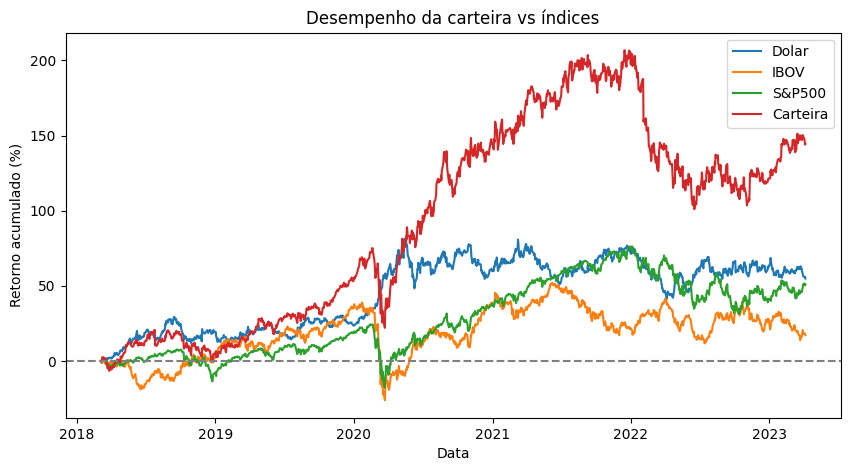

In [68]:
# Juntando todos os dados em um mesmo df
carteiraIndices = indices.join(saldos["Total"], how="right")

# Mudando o nome da coluna
carteiraIndices.rename(columns={"Total":"Carteira"}, inplace=True)

# Calculando rendimentos
carteiraIndices = carteiraIndices.pct_change()

# Acumulando
carteiraIndices = (1+carteiraIndices).cumprod()-1

# Ajustando a primeira linha
carteiraIndices.fillna(0, inplace=True)

# Transformando em percentual
carteiraIndices = carteiraIndices * 100

# Criando o grafico
fig, ax = plt.subplots(figsize=(10, 5))

## plot dos índices
ax.plot(carteiraIndices.index, carteiraIndices['Dolar'], label='Dolar')
ax.plot(carteiraIndices.index, carteiraIndices['IBOV'], label='IBOV')
ax.plot(carteiraIndices.index, carteiraIndices['S&P500'], label='S&P500')

## plot da carteira
ax.plot(carteiraIndices.index, carteiraIndices['Carteira'], label='Carteira')

## configurações do plot
ax.set_title('Desempenho da carteira vs índices')
ax.set_xlabel('Data')
ax.set_ylabel('Retorno acumulado (%)')
ax.legend()
ax.axhline(0, color='gray', linestyle='--')


plt.show()

# 9. Saldo em 02/03/2020

In [42]:
# Qual era o saldo da carteira no dia 02/03/2020?
saldoData = saldos.loc[datetime.datetime(2020,2,3)].sum()

saldoData

83092.89875607516